In [1]:
import numpy as np

gen = np.random.default_rng()

control = gen.normal(3, 5, 100) + gen.normal(0, 1, 100)
secure = gen.normal(3.5, 5, 100) + gen.normal(0, 1, 100)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
control = scaler.fit_transform(control.reshape(-1,1)) + 2.5
control = np.round(control[:, 0])
secure = scaler.fit_transform(secure.reshape(-1,1)) + 3.5
secure = np.round(secure[:, 0])

In [3]:
import pandas as pd

df1 = pd.DataFrame({"Rating": control, "Group": np.ones_like(control)})
df2 = pd.DataFrame({"Rating": secure, "Group": np.zeros_like(secure)})
df = pd.concat([df1, df2], ignore_index=True)

df.Group = df.Group.map({0: "With Secure GPT", 1: "Without Secure GPT"})
df

,Rating,Group
0,1.0,Without Secure GPT
1,2.0,Without Secure GPT
2,1.0,Without Secure GPT
3,2.0,Without Secure GPT
4,2.0,Without Secure GPT
...,...,...
195,4.0,With Secure GPT
196,4.0,With Secure GPT
197,3.0,With Secure GPT
198,2.0,With Secure GPT


C:\Users\user\anaconda3\envs\manis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\manis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\manis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\manis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

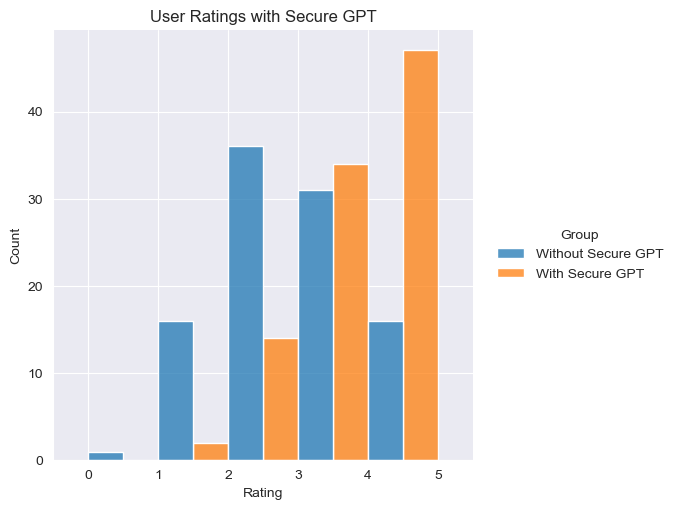

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plot = sns.displot(df, x="Rating", hue="Group", multiple="dodge", bins=5, binrange=(0, 5))
_ = plot.set(xlim=(-0.5,5.5), title="User Ratings with Secure GPT")